# Programming For Data Science - Final Project

## Group members:

| Name              | ID       |
|-------------------|----------|
| Pham Dang Son Ha |21127206|
| Nguyen Cao Khoi   | 21127632 |

## Table of Contents

1. [Collecting Data](#collecting-data)

2. [Exploring And Preprocessing Data](#exploring-and-preprocessing-data)

3. [Asking Meaningful Questions And Analyzing](#asking-meaningful-questions-and-analyzing)

4. [Reflection](#reflection)
5. [References](#references)

## 1. Collecting Data

### _1.1. Subject And Source_

-  Subject: The [Online Retails Sale Dataset](https://www.kaggle.com/datasets/rohitmahulkar/online-retails-sale-dataset/data?fbclid=IwAR073q0CYe_aoD5bjPNrycjMGsDoXCxytfm8p7WpWJTBH9XkqrOCrbV_LRU) contains transactions from 12/01/2010 to 12/09/2011 of an online retail company based in the UK. It includes 10 attributes, and the number of rows in the dataset is 541,909 rows.

- Source: The author got this data from [Tata Data Visualisation: Empowering Business with Effective Insights](https://www.theforage.com/simulations/tata/data-visualisation-p5xo), which is a virtual internship program offered by Tata Insights and Quants (Tata iQ) on the Forage platform.

### _1.2. Authors And Copyright_

- Author: [Rohit Mahulkar](https://www.kaggle.com/rohitmahulkar) (Owner)

- Copyright: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) - This means others can freely use, modify, and build upon these works for any purpose without any restrictions.

### _1.3. The way authors collect data_

- The author did not directly collect the data but was provided during his or her virtual internship program. In the program, participants are given a dataset and are tasked with cleaning, transforming, and analyzing the data to provide valuable insights

- The data collection methodology is not explicitly mentioned in the program. However, given that the dataset is about an online retail company, it’s likely that the data was collected from the company’s transaction records or customer database.

## 2. Exploring And Preprocessing Data

### _2.1. Import libraries_

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### _2.2. Loading the data_

In [198]:
data_df = pd.read_csv('Online Retail.csv')
data_df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


### _2.3. How many rows and columns ?_

- There are 541909 rows and 10 columns

In [199]:
data_df.shape

(541909, 10)

### _2.4. What is the meaning of each row ?_

- The meaning of each row: a transactions of an online retail company based in the UK. 


In [200]:
data_df.sample(1)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
288073,562129,03-08-2011,09:09:00 AM,20685,DOORMAT RED RETROSPOT,4,7.95,31.8,13186.0,United Kingdom


### _2.5. Are there duplicated rows?_

- There are 5268 duplicated rows

In [201]:
data_df.duplicated().sum()

5268

- We will remove duplicated rows and keep only the first occurence

In [202]:
data_df.drop_duplicates(inplace=True)

data_df.shape

(536641, 10)

### _2.6. What is the meaning of each column?_

- The meaning of each column: 
    + `InvoiceNo`: Transactions ID for successfull orders
    + `InvoiceDate`: Date in which the orders place
    + `InvoiceTime`: Time stamp in which the orders place relevant to geoghraphical location
    + `StockCode`: Products ID
    + `Description`: Name of product (contain some missing names of products which are return, damaged, lost etc...)
    + `Quantity`: The quantity of products sold (contain negative number of quantity which are return,damageded, lost etc...)
    + `UnitPrice`: Selling price of a single unit of product
    + `Totalsale`: Total of selling price. (`Totalsale` = `UnitPrice` * `Quantity`)
    + `CustomerID`: Customer Id
    + `Country`: Country Name

### _2.7. What is the current data type of each column?_

In [203]:
data_df.dtypes

InvoiceNo       object
InvoiceDate     object
InvoiceTime     object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Totalsale      float64
CustomerID     float64
Country         object
dtype: object

### _2.8. Are there columns having inappropriate data types?_

- There are 2 columns that have inapproriate data types: 
    - `InvoiceDate`: should be DataTime instead of `object`.
    - `InvoiceTime`: should be DataTime instead of `object`.
- We want to convert the all the columns that have `object` data type to `str` for accuracy.
- The CustomerID should be `str` intead of `float64`

In [204]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'],format= '%d-%m-%Y')
data_df['InvoiceTime'] = pd.to_datetime(data_df['InvoiceTime'],format= '%H:%M:%S %p')

data_df['StockCode'] = data_df['StockCode'].astype(str)
data_df['InvoiceNo'] = data_df['InvoiceNo'].astype(str)
data_df['Description'] = data_df['Description'].astype(str)
data_df['Country'] = data_df['Country'].astype(str)
data_df['CustomerID'] = data_df['CustomerID'].astype(str)

In [205]:
data_df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
InvoiceTime    datetime64[ns]
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Totalsale             float64
CustomerID             object
Country                object
dtype: object

### _2.9. With each numerical column, how are values distributed?_

- All numberic columns:
    - `Quantity`
    - `UnitPrice`
    - `Totalsale`

In [206]:
numeric_cols = data_df.columns[(data_df.dtypes != 'object') & (data_df.dtypes != 'datetime64[ns]')]  
numeric_cols

Index(['Quantity', 'UnitPrice', 'Totalsale'], dtype='object')

- The distribution of numerical attributes

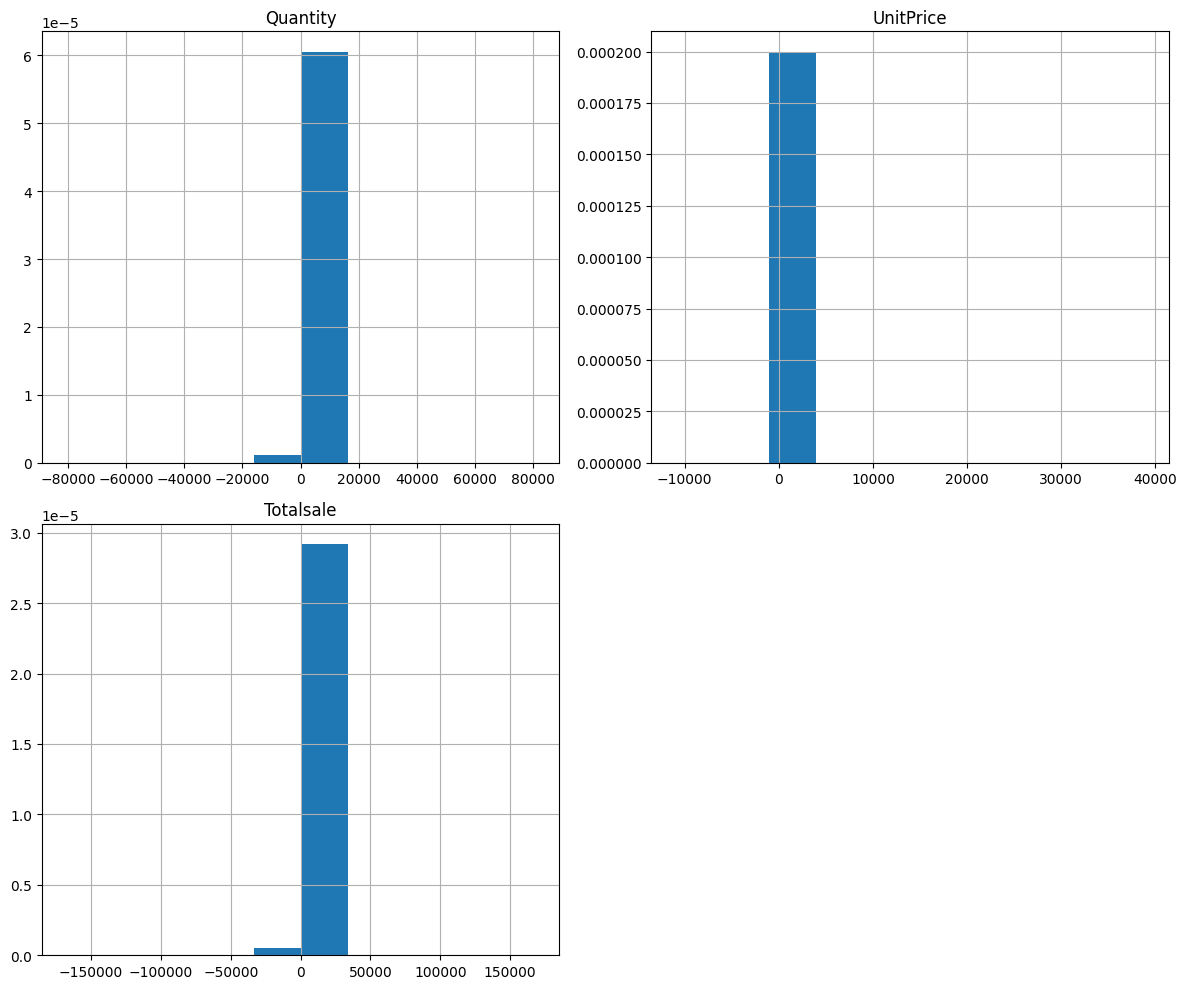

In [207]:
data_df[numeric_cols].hist(figsize=(12, 10), density= True)
plt.tight_layout()
plt.show()

_2.9.1 What is the percentage of missing values?_

- The percentage of missing values for each columns

In [208]:
numeric_missing_percent = pd.DataFrame({
    'col_name': numeric_cols,
    'percent_missing': data_df[numeric_cols].isnull().sum() * 100 / len(data_df[numeric_cols]),
})
numeric_missing_percent.index = np.arange(0, len(numeric_cols))
numeric_missing_percent

,col_name,percent_missing
0,Quantity,0.0
1,UnitPrice,0.0
2,Totalsale,0.0


_2.9.2 Min? max? Are they abnormal?_

- The min value of each numberic column

In [209]:
data_df[numeric_cols].min()

Quantity     -80995.00
UnitPrice    -11062.06
Totalsale   -168469.60
dtype: float64

- The max value of each numberic column

In [210]:
data_df[numeric_cols].max()

Quantity      80995.0
UnitPrice     38970.0
Totalsale    168469.6
dtype: float64

- We can say that the data is not abnormal because the histogram is symmetric with roughly equal peaks on both sides of the center.

### _2.10. With each categorical column, how are values distributed?_

In [211]:
categorical_cols = data_df.columns[(data_df.dtypes == 'object') | (data_df.dtypes == 'datetime64[ns]')]
categorical_cols

Index(['InvoiceNo', 'InvoiceDate', 'InvoiceTime', 'StockCode', 'Description',
       'CustomerID', 'Country'],
      dtype='object')

- The distribution of the `InvoiceTime`, `InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, `Country`, `CustomerID` column

In [212]:
data_df['InvoiceTime'].value_counts().head()

InvoiceTime
1900-01-01 03:56:00    2623
1900-01-01 02:41:00    2536
1900-01-01 03:17:00    2374
1900-01-01 04:14:00    2355
1900-01-01 02:09:00    2147
Name: count, dtype: int64

In [213]:
data_df['InvoiceNo'].value_counts().head()

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: count, dtype: int64

In [214]:
data_df['StockCode'].value_counts().head()

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
Name: count, dtype: int64

In [215]:
data_df['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: count, dtype: int64

- The distribution of the `InvoiceDate` column

<Axes: >

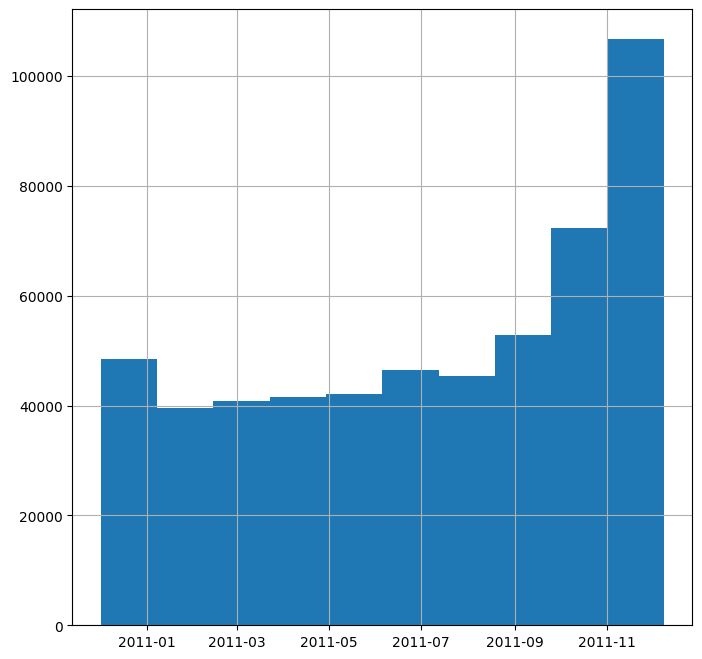

In [216]:
fig = plt.figure(figsize=(8, 8))
data_df['InvoiceDate'].hist()

- The distribution of the `Country` column

<BarContainer object of 38 artists>

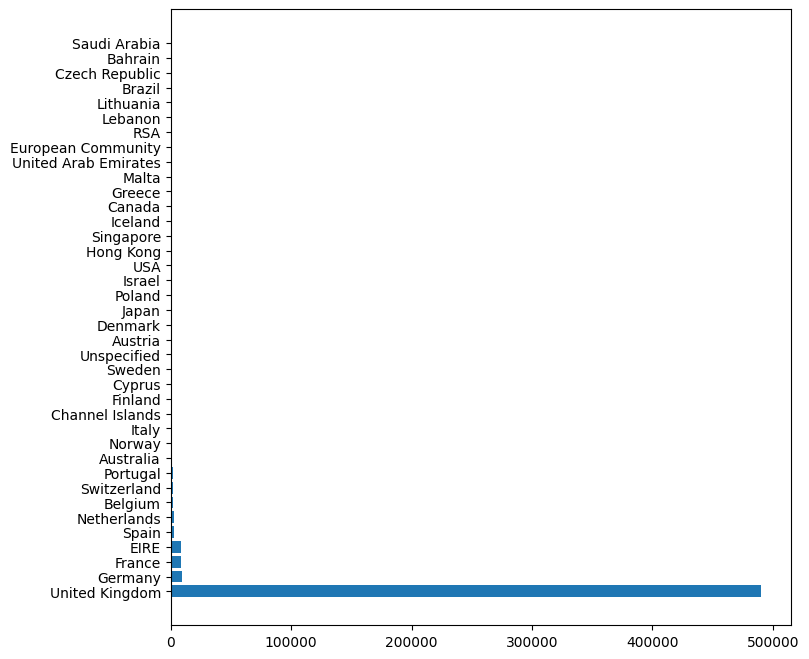

In [217]:
fig = plt.figure(figsize=(8, 8))
plt.barh(data_df['Country'].value_counts().index, data_df['Country'].value_counts().values)

We notice that the United Kingdom makes up a large proportion of the orders (> 90% of the total countries). This helps us to strategize that we will label the ‘country’ attribute into two categories: United Kingdom and other countries. This will help for solving the Clustering problem.

_2.10.1. What is the percentage of missing values?_

In [218]:
categorical_missing_percent = pd.DataFrame({
    'col_name': categorical_cols,
    'percent_missing': data_df[categorical_cols].apply(lambda x: x.isnull() | x.eq('nan')).mean() * 100
})
categorical_missing_percent.index = np.arange(0, len(categorical_cols))
categorical_missing_percent

,col_name,percent_missing
0,InvoiceNo,0.000000
1,InvoiceDate,0.000000
2,InvoiceTime,0.000000
3,StockCode,0.000000
4,Description,0.270945
5,CustomerID,25.163377
6,Country,0.000000


- We can see that there are only 2 columns with the data is missed. Especially the `CustumerID` columns contain the percent of missing data almost 25% of the data

_2.10.2. How many different values? Show a few_

In [219]:
unique_value = pd.DataFrame({
    'col_name': categorical_cols,
    'number_unique': data_df[categorical_cols].nunique(),
})
unique_value.index = np.arange(0, len(categorical_cols))
unique_value

,col_name,number_unique
0,InvoiceNo,25900
1,InvoiceDate,305
2,InvoiceTime,718
3,StockCode,4070
4,Description,4224
5,CustomerID,4373
6,Country,38


In [220]:
data_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [221]:
data_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

_2.10.3. Are they abnormal?_

- We can say that the data is not abnormal because the histogram is symmetric with roughly equal peaks on both sides of the center.

### _2.11. Can we reduce the dimensionality of the data?_

- We can remove `InvoiceTime` column. The reason is that the time data of this file is not consistent among customers. Depending on each different geographical location, the order time zone will vary. Therefore, to be more objective and comprehensive, the team only uses the date data of the `InvoiceDate` column.

In [222]:
data_df = data_df.drop('InvoiceTime', axis=1)
data_df.shape

(536641, 9)

### _2.12. Are there any outliers in the data?_

In [224]:
for cols in numeric_cols:
    Q1 = data_df[cols].quantile(0.25)
    Q3 = data_df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    data_df = data_df.query('(@Q1 - 1.5 * @IQR) <= {} <= (@Q3 + 1.5 * @IQR)'.format(cols))

data_df.shape

(426704, 9)

# Cao Khoi

## 3. Asking Meaningful Questions And Analyzing

# Son Ha

## 3. Asking Meaningful Questions And Analyzing

## 4. Reflection

## 5. References